In [8]:
import nlpaug.augmenter.audio as naa
import torchaudio
import os
import torch
import glob
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

In [2]:
PATH = 'C:/Users/ZAKAR/Documents/GitHub/AIFFEL/AIFFELthon/data/'
DATA_PATH = os.path.join(PATH + 'training_data/')

data_list = [os.path.join(DATA_PATH, f) for f in os.listdir(DATA_PATH) if os.path.isfile(os.path.join(DATA_PATH, f)) and f.endswith('.wav')]

audio_data = []
for data in data_list:
    waveform, sample_rate = torchaudio.load(data)
    file_name = os.path.basename(data).split('.')[0]
    audio_data.append((waveform, sample_rate, file_name))

In [3]:
def gen_augmented(original, sample_rate, file_name):
	# list of augmentors available from the nlpaug library
	augment_list = [
	#naa.CropAug(sampling_rate=sample_rate)
	('NoiseAug', naa.NoiseAug()),
	('LoudnessAug', naa.LoudnessAug(factor=(0.5, 2))),
	('VtlpAug', naa.VtlpAug(sampling_rate=sample_rate, zone=(0.0, 1.0))),
	('PitchAug', naa.PitchAug(sampling_rate=sample_rate, factor=(-1,3)))
	]
	# sample augmentation randomly
	augmented_list = []
	for type, augment in augment_list:
		augmented_data = augment.augment(original.numpy()[0])
		augmented_list.append((file_name, type, augmented_data))
	return augmented_list

In [4]:
augmented_data_list = []
for data, sample_rate, file_name in audio_data:
    augmented_data = gen_augmented(data, sample_rate, file_name)
    augmented_data_list.append(augmented_data)

In [6]:
OUPUT_PATH = os.path.join(PATH + 'augmented_data/')

for augmented_data_set in augmented_data_list:
    for file_name, type, augmented_data in augmented_data_set:
        output_filepath = os.path.join(OUPUT_PATH, f'{file_name}_{type}.wav')
        torchaudio.save(output_filepath, torch.tensor(augmented_data), sample_rate)

증강법 비교 시각화

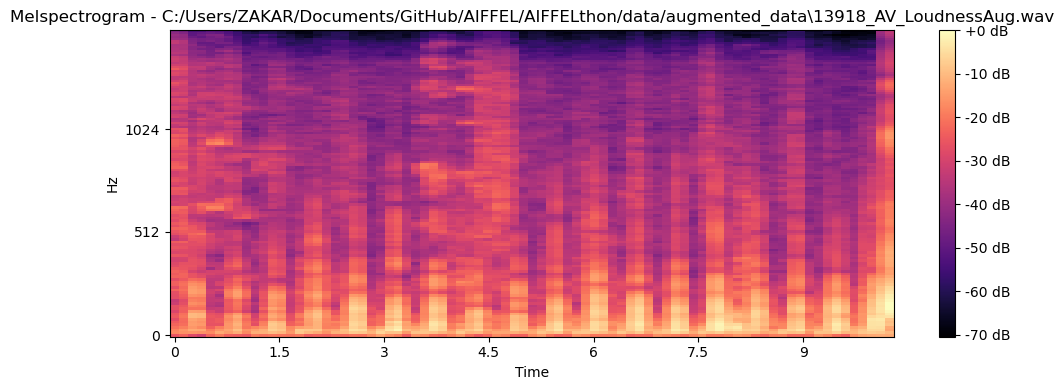

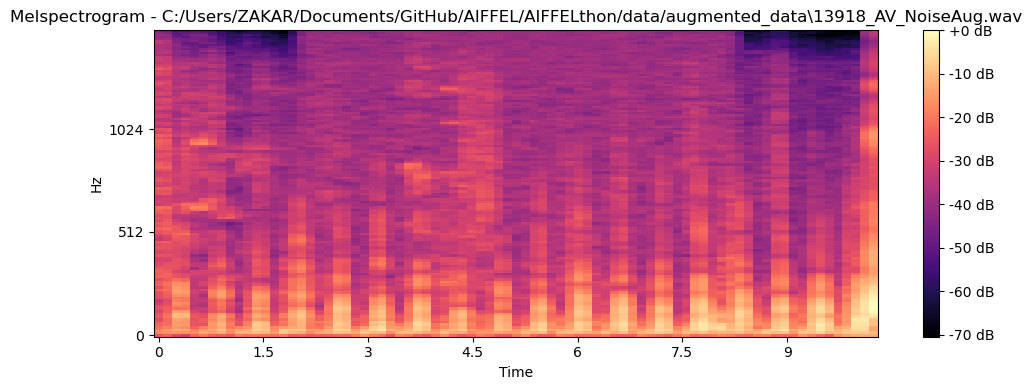

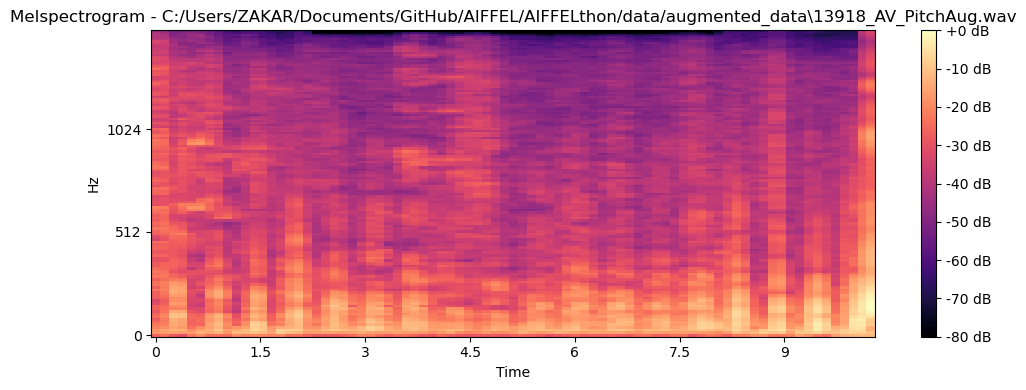

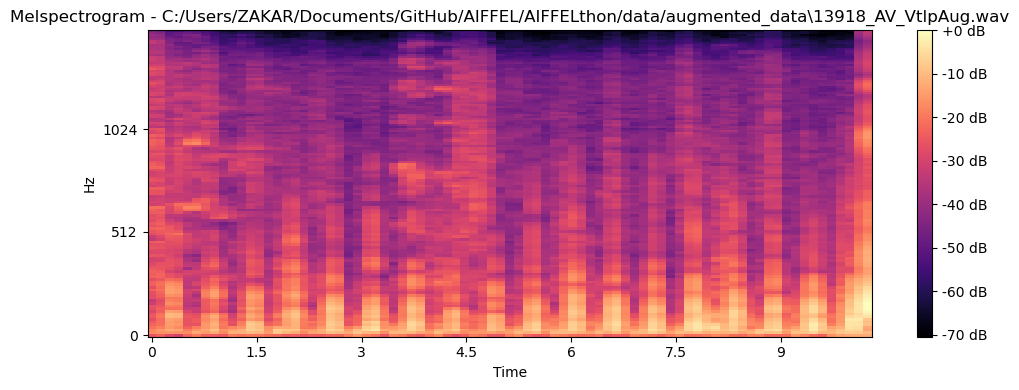

In [9]:
AUGMENTED_PATH = os.path.join(PATH + 'augmented_data/')
wav_files = glob.glob(os.path.join(AUGMENTED_PATH, '*.wav'))

for wav in wav_files[0:4]:
    y, sr = librosa.load(wav, sr=4000)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    log_S = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+02.0f dB')
    plt.title(f'Melspectrogram - {wav}')
    plt.tight_layout()
    plt.show()